## Assignment
This data contains the results of an A/B test.

For this analysis:

*  Check for adequate sample sizes.
*  Check for changes over time in results.
*  Formally test for a significant difference in conversions between treatment and control groups.

In [0]:
#import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
#load dataset
data = pd.read_csv('https://tf-assets-prod.s3.amazonaws.com/tf-curric/data-science/ab_edited.csv')

In [0]:
#review data
data.info()
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 290585 entries, 0 to 290584
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   user_id       290585 non-null  int64 
 1   timestamp     290585 non-null  object
 2   group         290585 non-null  object
 3   landing_page  290585 non-null  object
 4   converted     290585 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 11.1+ MB


,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


In [0]:
data['date'] = pd.DatetimeIndex(data['timestamp']).date
print(data.date.unique())

[datetime.date(2017, 1, 21) datetime.date(2017, 1, 12)
 datetime.date(2017, 1, 11) datetime.date(2017, 1, 8)
 datetime.date(2017, 1, 10) datetime.date(2017, 1, 19)
 datetime.date(2017, 1, 17) datetime.date(2017, 1, 4)
 datetime.date(2017, 1, 15) datetime.date(2017, 1, 18)
 datetime.date(2017, 1, 9) datetime.date(2017, 1, 22)
 datetime.date(2017, 1, 24) datetime.date(2017, 1, 23)
 datetime.date(2017, 1, 20) datetime.date(2017, 1, 5)
 datetime.date(2017, 1, 6) datetime.date(2017, 1, 13)
 datetime.date(2017, 1, 7) datetime.date(2017, 1, 3)
 datetime.date(2017, 1, 2) datetime.date(2017, 1, 16)
 datetime.date(2017, 1, 14)]


In [0]:
control = data[data['group'] == 'control']
treatment = data[data['group']== 'treatment']

In [0]:
print("Treatment Groupd: ", len(treatment))
print("Control Group: ", len(control))
print('Test proportion: ', data.converted.mean())

print('Sign-up Rate Treatment: ', treatment.converted.mean())
print('Sign-up Rate Control: ', control.converted.mean())


Treatment Groupd:  145311
Control Group:  145274
Test proportion:  0.11959667567149027
Sign-up Rate Treatment:  0.11880724790277405
Sign-up Rate Control:  0.1203863045004612


In [0]:
#perform t-test
stats.ttest_ind(treatment.converted, control.converted)

Ttest_indResult(statistic=-1.3116069027036805, pvalue=0.18965383906859376)

The groups seems to be pretty evenly split

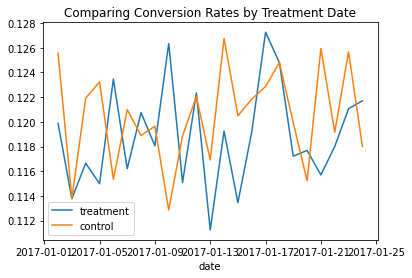

T-Test Results by Date
Ttest_indResult(statistic=-1.8123288054674913, pvalue=0.0699579338988825)
Ttest_indResult(statistic=0.05182821974845549, pvalue=0.9586663564605943)
Ttest_indResult(statistic=-0.6795024407954999, pvalue=0.49683133482307695)
Ttest_indResult(statistic=0.33111903181744556, pvalue=0.7405597598504309)
Ttest_indResult(statistic=2.3999515991310387, pvalue=0.01641085244784032)
Ttest_indResult(statistic=-0.4836129647924235, pvalue=0.628668638020595)
Ttest_indResult(statistic=0.7611804663738991, pvalue=0.446562930057432)
Ttest_indResult(statistic=-0.9315635899845935, pvalue=0.3515792521983202)
Ttest_indResult(statistic=-1.261388402374626, pvalue=0.20719113309271808)
Ttest_indResult(statistic=-0.0026642818202597274, pvalue=0.9978742538059032)
Ttest_indResult(statistic=-0.28071255594768935, pvalue=0.7789352633524722)
Ttest_indResult(statistic=-0.2056136446252576, pvalue=0.837095874040602)
Ttest_indResult(statistic=0.4909032980527966, pvalue=0.6235093367111435)
Ttest_indResult

In [0]:
fig = treatment[['date', 'converted']].groupby('date').mean().plot()
control[['date', 'converted']].groupby('date').mean().plot(ax=fig)

plt.legend(['treatment','control'])
plt.title('Comparing Conversion Rates by Treatment Date')
plt.show()


# Generate a test statistic comparing test and control on treatment date
print('T-Test Results by Date')

for day in data.date.unique():
    dated_data = data[data.date == day]
    print(stats.ttest_ind(dated_data[dated_data.group == 'treatment'].converted,
                          dated_data[dated_data.group == 'control'].converted))